Importando as bibliotecas necessárias para elaboração do projeto

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

importando arquivo base, lendo e verificando o dataset

In [6]:
df = pd.read_csv('/content/base-alugueis-sp.csv')
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [7]:
#verificando quantidade de linhas e colunas
df.shape

(11657, 8)

In [8]:
#verificando exixtência de duplicidade no dataset
df.duplicated().sum()

0

In [9]:
#verificndo presença de dados nulos
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [10]:
#verificndo tipos de cada variável
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [11]:
#descrição sobre cada variável
df.describe().round()

,area,bedrooms,garage,rent,total
count,11657.0,11657.0,11657.0,11657.0,11657.0
mean,85.0,2.0,1.0,3251.0,4080.0
std,74.0,1.0,1.0,2651.0,3352.0
min,0.0,0.0,0.0,500.0,509.0
25%,40.0,1.0,0.0,1590.0,1996.0
50%,60.0,2.0,1.0,2415.0,3057.0
75%,96.0,3.0,2.0,3800.0,4774.0
max,580.0,6.0,6.0,25000.0,28700.0


Considerando os dados acima, iremos filtrar os dados com imóveis que possuem área a partir de (40m²)

In [12]:
#filtragem dos dados em um novo dataset
dados=df[df['area']>=40]
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187
10,Rua dos Carmelitas,Sé,63,2,0,Apartamento,1500,2020
13,Rua Herison,Lauzane Paulista,50,3,0,Casa em condomínio,1437,1517


Trabalhando com o valor dos alugueis como base de calculo, excluiremos o "valor total" e daremos inicio ao nosso modelo.


In [13]:
#Novo dataset com o filtro de "total"
dados.drop(['total'], axis=1)
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187
10,Rua dos Carmelitas,Sé,63,2,0,Apartamento,1500,2020
13,Rua Herison,Lauzane Paulista,50,3,0,Casa em condomínio,1437,1517


Inicio da análise dos dados após filtragens

Text(0, 0.5, 'Quantidade')

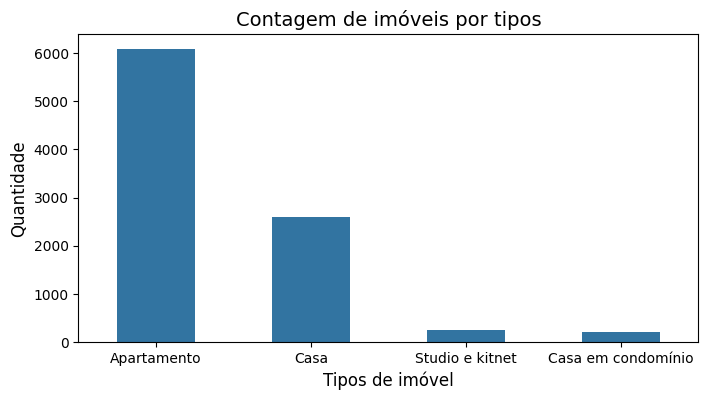

In [14]:
#dados da categoria de imóveis
contagem_tipo = dados["type"].value_counts().sort_values(ascending=False).index
ax= sns.countplot(x=dados["type"], order=contagem_tipo, width=0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Contagem de imóveis por tipos',fontsize=14)
ax.set_xlabel('Tipos de imóvel',fontsize=12)
ax.set_ylabel('Quantidade',fontsize=12)


In [15]:
#convertendo os valores em percentual para cada tipo de imóvel
tipo_imoveis = dados['type'].value_counts(normalize=True)
tipo_imoveis

type
Apartamento           0.665246
Casa                  0.284044
Studio e kitnet       0.028525
Casa em condomínio    0.022186
Name: proportion, dtype: float64

Nesta amostra temos o resultado seguinte:


*   Apartamentos = 66% dos imóveis;
*   Casa = 28,4% dos imóveis;
*   Studio e Kitnet = 2,8% dos imóveis;
*   Casa em codomínio = 2,2% dos imóveis.





Matriz de correlação entre as variáveis ('area', 'bedrooms',
 'garage')

In [16]:
#criando uma correlação
dados.corr(numeric_only=True)

,area,bedrooms,garage,rent,total
area,1.000000,0.680729,0.699057,0.650634,0.630582
bedrooms,0.680729,1.000000,0.600887,0.498116,0.488917
garage,0.699057,0.600887,1.000000,0.591061,0.587230
rent,0.650634,0.498116,0.591061,1.000000,0.976640
total,0.630582,0.488917,0.587230,0.976640,1.000000


In [17]:
#alterando cores dos gráficos
sns.set_palette('Accent')
sns.set_style('darkgrid')

Text(0.5, 0, 'Preço dos imóveis')

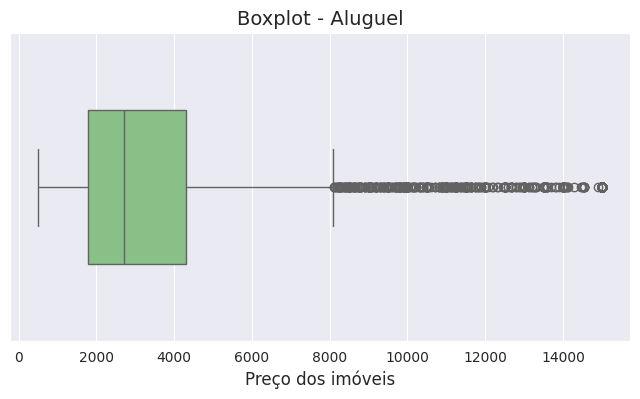

In [18]:
#análise da variável dependente 'Y' - Rent(Aluguel)
ax= sns.boxplot(dados['rent'], orient='h', width=0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Boxplot - Aluguel',fontsize=14)
ax.set_xlabel('Preço dos imóveis',fontsize=12)


Neste boxplot, podemos deduzir que dentro do conjunto temos muitos imóveis com preço baixo e uma incidência maior "outlier" de imóveis com preço entre 8.000 e 14.000 reais

Distribuição de Frequências

Text(0.5, 0, 'Preço dos imóveis (R$)')

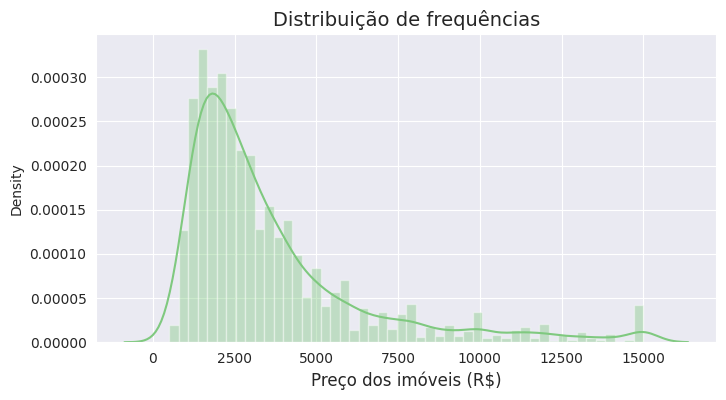

In [19]:
ax= sns.distplot(dados['rent'])
ax.figure.set_size_inches(8,4)
ax.set_title('Distribuição de frequências',fontsize=14)
ax.set_xlabel('Preço dos imóveis (R$)',fontsize=12)

Agora a visualização da distribuição fica mais clara com as tendências de imóveis entre 500 e 5000 reais, porém uma tendência contínua para imóveis de maior valor.

Analise da dispersão entre variáveis com o pairplot

Text(0.5, 1.05, 'Dispersão entre as variáveis')

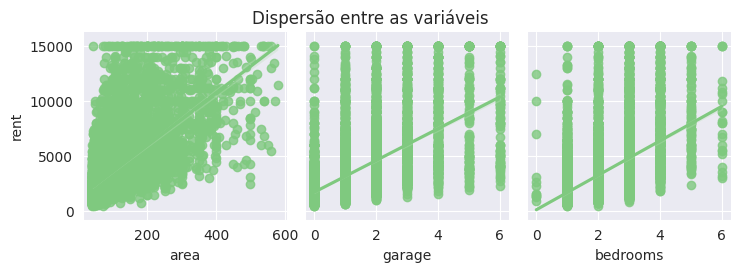

In [20]:
ax= sns.pairplot(dados, y_vars='rent', x_vars=['area', 'garage', 'bedrooms'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', y=1.05)


Transformando os dados com aplicação logarítmica


*   Aproximação de uma distribuição normal
*   Adequação para as variáveis com valor "0", somando +1 , evitando o retorno do valor log -int, desta forma ele retornará com o valor aceitável "log(1) passa a ser 0 "



In [21]:
dados['log_rent']= np.log(dados['rent'])
dados['log_area']= np.log(dados['area'])
dados['log_bedrooms']= np.log(dados['bedrooms']+1)
dados['log_garage']= np.log(dados['garage']+1)

In [22]:
dados.head()

,address,district,area,bedrooms,garage,type,rent,total,log_rent,log_area,log_bedrooms,log_garage
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,7.467371,4.025352,1.098612,1.098612
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587,8.242756,3.912023,1.098612,0.693147
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187,8.160518,4.276666,1.098612,0.693147
10,Rua dos Carmelitas,Sé,63,2,0,Apartamento,1500,2020,7.313220,4.143135,1.098612,0.000000
13,Rua Herison,Lauzane Paulista,50,3,0,Casa em condomínio,1437,1517,7.270313,3.912023,1.386294,0.000000


Distribuição de Frequência variável dependente transformada (y)

Text(0.5, 0, 'Log preço dos imóveis (R$)')

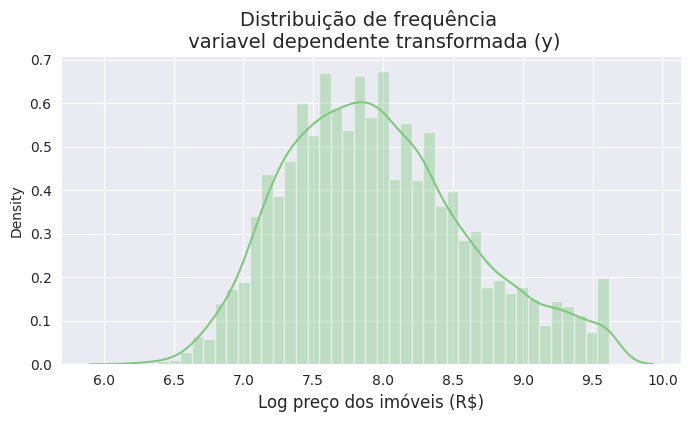

In [23]:
ax= sns.distplot(dados['log_rent'])
ax.figure.set_size_inches(8,4)
ax.set_title('Distribuição de frequência \n variavel dependente transformada (y)',fontsize=14)
ax.set_xlabel('Log preço dos imóveis (R$)',fontsize=12)

Dispersão entre variáveis transformadas com o pairplot

Text(0.5, 1.05, 'Dispersão entre as variáveis transformadas')

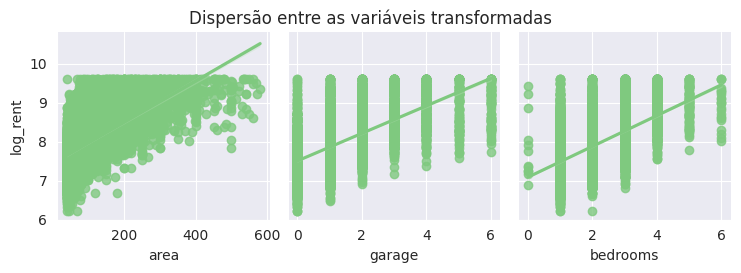

In [24]:
ax= sns.pairplot(dados, y_vars='log_rent', x_vars=['area', 'garage', 'bedrooms'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis transformadas', y=1.05)

Criação de dataset de Treino e Testes

*   Utilização da biblioteca sklearn, com o modulo train_test_split
*   Percentual de 30% de amostra para teste.



In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Criação de uma Séries em pandas para variável dependente (y)
y = dados['log_rent']
y

3        7.467371
5        8.242756
6        8.160518
10       7.313220
13       7.270313
           ...   
11652    8.318742
11653    9.328123
11654    8.411833
11655    9.104980
11656    8.101678
Name: log_rent, Length: 9150, dtype: float64

In [27]:
#Criação de um DataFrame em pandas para as variáveis explicativas (x)
X = dados[['log_area', 'log_garage', 'log_bedrooms']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Estimando modelo com o Statsmodels

In [29]:
X_train_con_constante = sn.add_constant(X_train)
X_train_con_constante.head()

,const,log_area,log_garage,log_bedrooms
5524,1.0,3.737670,0.693147,0.693147
4543,1.0,4.007333,0.693147,1.098612
5844,1.0,3.912023,0.693147,0.693147
1917,1.0,3.737670,0.000000,0.693147
2081,1.0,3.713572,0.000000,1.098612


In [30]:
modelo_statsmodels = sn.OLS(y_train, X_train_con_constante, hasconst=True).fit()

In [31]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     2320.
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        22:33:31   Log-Likelihood:                -4021.0
No. Observations:                6405   AIC:                             8050.
Df Residuals:                    6401   BIC:                             8077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2695      0.051    103.260   

Avaliando o sumário de estatísticas

*   Análise dos valores obtidos na tabela temos um valor R² baixo (0.530) e um Prob (F-statistic) de 0.00;
*   O valor P>|t| (0.894) da variavel 'bedromms' não atende as exigências, (<=0.05), sendo retirado da proxima avaliação.



In [53]:
#Novo modelo para análise
X = dados[['log_area', 'log_garage']]
X

,log_area,log_garage
3,4.025352,1.098612
5,3.912023,0.693147
6,4.276666,0.693147
10,4.143135,0.000000
13,3.912023,0.000000
...,...,...
11652,4.543295,0.693147
11653,5.857933,1.609438
11654,4.430817,1.098612
11655,4.330733,0.000000


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [55]:
X_train_con_constante = sn.add_constant(X_train)
X_train_con_constante.head()

,const,log_area,log_garage
9152,1.0,4.976734,1.098612
10597,1.0,4.262680,1.098612
4838,1.0,3.737670,0.693147
3205,1.0,4.700480,0.000000
3184,1.0,4.094345,0.000000


In [35]:
modelo_statsmodels = sn.OLS(y_train, X_train_con_constante, hasconst=True).fit()

In [36]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     2394.
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        22:33:31   Log-Likelihood:                -4014.2
No. Observations:                6405   AIC:                             8036.
Df Residuals:                    6401   BIC:                             8063.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2994      0.051    104.501   

Estimando o modelo com os dados do treino

*   Utilizando o modulo LinearRegression



In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [71]:
modelo = LinearRegression()

In [72]:
modelo.fit(X_train, y_train)

LinearRegression()

In [75]:
print('R²={}'.format(modelo.score(X_train, y_train).round(2)))

R²=0.53


Obtendo Previsões

Dados de Teste (X_test) utilizando o predict() do modelo

In [77]:
y_previsto = modelo.predict(X_test)

Gerando R² do modelo Teste

In [78]:
print('R²= {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

R²= 0.51


Entrada

In [74]:
entrada = X_test[0:1]
entrada

,log_area,log_garage
818,4.077537,0.693147


Previsão pontual

In [79]:
modelo.predict(entrada)[0]

7.77462171987023

Transformando a previsão para valores estimados em reais

In [80]:
np.exp(modelo.predict(entrada)[0])

2379.4430338078273

Criando um simulador de preços

In [81]:
area= 450
garage= 2
entrada= [[np.log(area), np.log(garage)+1]]

print('R${0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$11267.16


Geração de previsões do modelo para dados de treino

In [82]:
y_previsto_train = modelo.predict(X_train)

Comparação "Previsão x Real"

Text(0, 0.5, 'log do preço - Real')

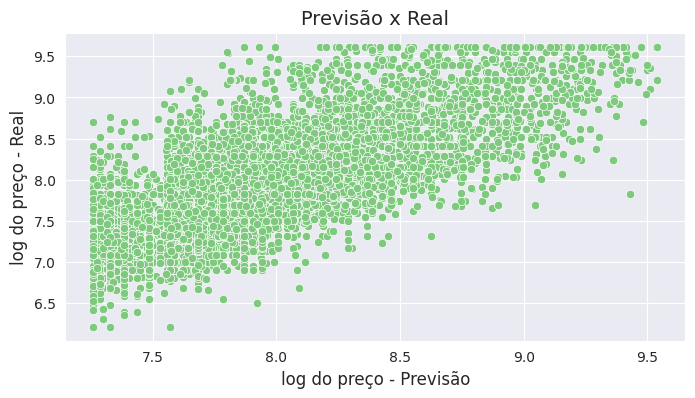

In [83]:
ax= sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(8,4)
ax.set_title('Previsão x Real',fontsize=14)
ax.set_xlabel('log do preço - Previsão',fontsize=12)
ax.set_ylabel('log do preço - Real',fontsize=12)

Resíduos

In [84]:
residuo= y_train - y_previsto_train

Text(0.5, 0, 'Log de preço')

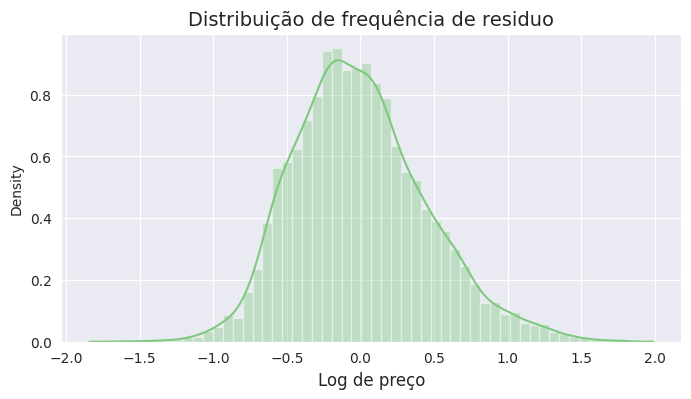

In [85]:
ax= sns.distplot(residuo)
ax.figure.set_size_inches(8,4)
ax.set_title('Distribuição de frequência de residuo',fontsize=14)
ax.set_xlabel('Log de preço',fontsize=12)

Interpretação dos coeficientes

In [86]:
modelo.intercept_

5.2200367759397786

In [87]:
modelo.coef_

array([0.55323238, 0.43101839])

In [91]:
X.columns

Index(['log_area', 'log_garage'], dtype='object')

In [100]:
pd.DataFrame(data=np.append(modelo.intercept_ ,modelo.coef_), columns=['Parametros'])

,Parametros
0,5.220037
1,0.553232
2,0.431018


In [101]:
print('R$ {}'.format(np.exp(modelo.intercept_).round(2)))

R$ 184.94


Conclusão dos coeficientes

1.   Intercepto - Retirando as variáveis explicativas o efeito médio dos imóveis será de **5.2200367759397786** (intercept), correspondente à  **R$ 184,94**;

2.   Área - Com o valor constante da variável explicativa 'garagem' e um acréscimo de **1%** na área (m²) do imóvel ele gera na média um acréscimo de **0,55%** no valor do mesmo;

1.  Garagem - Com o valor constante da variável explicativa área (m²) e um acréscimo de **1%** na 'garagem' do imóvel ele gera na média um acréscimo de **0,43%** no valor do mesmo.




